# CSE 351 - Data Science Project
## What Makes People in a Country Happy?
### By Felix Zhu, Kevin Chen, Tommy Lin

## Importing Libraries and Files
<p>We imported all the Python libraries needed to do our project. We also imported the CSV files which are our datasets.</p>

In [1]:
# Importing some Python libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Importing our datasets that contain information about world happiness statistics

data2015 = pd.read_csv('world_happiness/2015.csv')
data2016 = pd.read_csv('world_happiness/2016.csv')
data2017 = pd.read_csv('world_happiness/2017.csv')
data2018 = pd.read_csv('world_happiness/2018.csv')
data2019 = pd.read_csv('world_happiness/2019.csv')

## Observing the Data

In [3]:
# Displaying the 2015 dataset to visualize what features there are.

print("This is the 2015 dataset:")
data2015.head()

# Features include Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita),
# Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual.

# These 12 features are provided by the 2015 dataset.

This is the 2015 dataset:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# Displaying the 2016 dataset to visualize what features there are.

print("This is the 2016 dataset:")
data2016.head()

# Features include Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval,
# Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual.

# These 13 features are provided by the 2016 dataset.
# Compared to the 2015 dataset, we can already see some noticable differences in features. 
# For example, in the 2016 dataset, we now have 'Lower Confidence Interval' and 'Upper Confidence Interval'.
# However, compared to the 2015 dataset, the 2016 dataset does not have the feature 'Standard Error'.
# These three features may need to be removed from their respective datasets when we clean the data.

This is the 2016 dataset:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
# Displaying the 2017 dataset to visualize what features there are.

print("This is the 2017 dataset:")
data2017.head()

# There are 12 features provided by the 2017 dataset.
# On initial observation, there are features that are equal to the features we have already seen, but the name
# of the features are spelled differently. For example, "Happiness Rank" appears are "Happiness.Rank" in this
# dataset. We will need to rename these features later on for more uniformity among all the datasets.

# This 2017 dataset introduces two new features that are unseen from the two previous datasets, which are
# "Whisker.high" and "Whisker.low". We may need to drop these features from the dataset when cleaning the data.
# We also notice that there is no "Region" feature in this dataset.

This is the 2017 dataset:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
# Displaying the 2018 dataset to visualize what features there are.

print("This is the 2018 dataset:")
data2018.head()

# There are only 9 features provided by the 2018 dataset, compared to the 2015 (12), 2016 (13), 2017 (12) datasets.
# We noticed that there is a feature "Country or region" that could possibly combine the two features "Country" and 
# "Region". However, based on observing the data, we believe that the feature "Region" from the 2015 and 2016 datasets
# don't provide any useful additional information to us, so we can remove the feature from those datasets later.

# Some features in the 2018 dataset also may be named differently from their corresponding features in the previously
# observed datasets. For example, "Score" in the 2018 dataset may be the "Happiness Score" from other datasets.
# "Social support" feature may actually be the "Family" feature. "Perceptions of corruption" may actually be the
# "Dystopia Residual" feature. "Freedom to make life choices" may actually be the "Freedom" feature.
# All of these mentioned features will have to be renamed later on to ensure uniformity among the datasets.

This is the 2018 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
# Displaying the 2019 dataset to visualize what features there are.

print("This is the 2019 dataset:")
data2019.head()

# These are the same 9 features as the 2018 dataset. 
# The same details mentioned for the 2018 dataset could be applied to this dataset too.

This is the 2019 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Cleaning Data
<p>First, we create a dictionary to store all the data (CSV) because it is cleaner when we try using the data sets in the future.</p>

<p>To clean our data, we renamed the columns that way all the names are consistent. We also check for any NULL values and replaced them with the mean value of the column. This way the data does not get changed.</p>

<p>We added the Year column so it is easier for us to use Python library functions later on in our project.</p>

<p>We removed the columns that are not needed (Standard Error, Region, Lower and Upper Confidence Level, Whisker.high and low). Even though the 2018 and 2019 data does not have the Dystopia Residual column, we were able to calculate it by calculating the difference of the happiness score and the sum of all the happiness features.</p>

<p>Note: The 2015, 2016, 2017 data have a column named Family and the 2018 and 2019 data have a column named Social support. Since they are similar features, we named the columns in the data set, 'Family or Social Support.' 

In [8]:
full_data = {'2015':data2015, '2016':data2016, '2017':data2017, '2018':data2018, '2019':data2019}

# Country
full_data['2018'].rename(columns = {'Country or region': 'Country'}, inplace = True)
full_data['2019'].rename(columns = {'Country or region': 'Country'}, inplace = True)

# Happiness Rank
full_data['2017'].rename(columns = {'Happiness.Rank': 'Happiness Rank'}, inplace = True)
full_data['2018'].rename(columns = {'Overall rank': 'Happiness Rank'}, inplace = True)
full_data['2019'].rename(columns = {'Overall rank': 'Happiness Rank'}, inplace = True)

# Happiness Score
full_data['2017'].rename(columns = {'Happiness.Score': 'Happiness Score'}, inplace = True)
full_data['2018'].rename(columns = {'Score': 'Happiness Score'}, inplace = True)
full_data['2019'].rename(columns = {'Score': 'Happiness Score'}, inplace = True)

# Economy
full_data['2015'].rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita'}, inplace = True)
full_data['2016'].rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita'}, inplace = True)
full_data['2017'].rename(columns = {'Economy..GDP.per.Capita.': 'GDP per Capita'}, inplace = True)
full_data['2018'].rename(columns = {'GDP per capita': 'GDP per Capita'}, inplace = True)
full_data['2019'].rename(columns = {'GDP per capita': 'GDP per Capita'}, inplace = True)

# Freedom
full_data['2018'].rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True)
full_data['2019'].rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True)

# Perceptions of Corruption
full_data['2015'].rename(columns = {'Trust (Government Corruption)': 'Trust'}, inplace = True)
full_data['2016'].rename(columns = {'Trust (Government Corruption)': 'Trust'}, inplace = True)
full_data['2017'].rename(columns = {'Trust..Government.Corruption.': 'Trust'}, inplace = True)
full_data['2018'].rename(columns = {'Perceptions of corruption': 'Trust'}, inplace = True)
full_data['2019'].rename(columns = {'Perceptions of corruption': 'Trust'}, inplace = True)

# Family or Social Support
full_data['2015'].rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
full_data['2016'].rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
full_data['2017'].rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
full_data['2018'].rename(columns = {'Social support': 'Family or Social Support'}, inplace = True)
full_data['2019'].rename(columns = {'Social support': 'Family or Social Support'}, inplace = True)

# Life Expectancy
full_data['2015'].rename(columns = {'Health (Life Expectancy)': 'Life Expectancy'}, inplace = True)
full_data['2016'].rename(columns = {'Health (Life Expectancy)': 'Life Expectancy'}, inplace = True)
full_data['2017'].rename(columns = {'Health..Life.Expectancy.': 'Life Expectancy'}, inplace = True)
full_data['2018'].rename(columns = {'Healthy life expectancy': 'Life Expectancy'}, inplace = True)
full_data['2019'].rename(columns = {'Healthy life expectancy': 'Life Expectancy'}, inplace = True)

# Drop columns that we do not need
full_data['2015'].drop('Standard Error', inplace = True, axis = 1)
full_data['2015'].drop('Region', inplace = True, axis = 1)
full_data['2016'].drop('Region', inplace = True, axis = 1)
full_data['2016'].drop('Lower Confidence Interval', inplace = True, axis = 1)
full_data['2016'].drop('Upper Confidence Interval', inplace = True, axis = 1)
full_data['2017'].drop('Whisker.high', inplace = True, axis = 1)
full_data['2017'].drop('Whisker.low', inplace = True, axis = 1)

# Adding the year column
full_data['2015']['Year'] = 2015
full_data['2016']['Year'] = 2016
full_data['2017']['Year'] = 2017
full_data['2018']['Year'] = 2018
full_data['2019']['Year'] = 2019

In [9]:
# The 2018 data set has a NULL value in the Trust column!
trust_average = full_data['2018']['Trust'].mean()

# Replace Null values with the mean value of the Trust column
full_data['2018']['Trust'].fillna(trust_average, inplace=True)

In [10]:
# Dystopia Residual
full_data['2017'].rename(columns = {'Dystopia.Residual': 'Dystopia Residual'}, inplace = True)
full_data['2018']["Dystopia Residual"] = full_data['2018']["Happiness Score"] - full_data['2018']["GDP per Capita"] - full_data['2018']["Family or Social Support"] - full_data['2018']["Life Expectancy"] - full_data['2018']["Freedom"] - full_data['2018']["Generosity"] - full_data['2018']["Trust"]
full_data['2019']["Dystopia Residual"] = full_data['2019']["Happiness Score"] - full_data['2019']["GDP per Capita"] - full_data['2019']["Family or Social Support"] - full_data['2019']["Life Expectancy"] - full_data['2019']["Freedom"] - full_data['2019']["Generosity"] - full_data['2019']["Trust"]

In [11]:
# Reorganizing column for best output and readability
for data in full_data:
    full_data[data] = full_data[data].reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])

In [12]:
full_data['2015'].head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
# full_data['2016'].head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2016,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2016,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,2016,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,2016,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [14]:
# full_data['2017'].head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2017,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,2017,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,2017,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,2017,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,2017,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182


In [15]:
# full_data['2018'].head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2018,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2.585
1,2018,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2.383
2,2018,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2.371
3,2018,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2.426
4,2018,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2.318


In [16]:
# full_data['2019'].head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2019,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2.714
1,2019,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2.394
2,2019,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2.241
3,2019,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2.401
4,2019,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2.394


In [8]:
# full_data['2019'].shape

(156, 10)

In [9]:
# full_data['2019'].isnull().sum()

Happiness Rank              0
Country                     0
Happiness Score             0
GDP per Capita              0
Family or Social Support    0
Life Expectancy             0
Freedom                     0
Generosity                  0
Trust                       0
Dystopia Residual           0
dtype: int64

## EDA

### What are the central tendencies of happiness score over the years? Did they increase or decrease?
We will analyze the happiness score over the years using both median and mean measures of central tendency. After plotting these values, we will assess which one provides a more meaningful insight into our dataset.

In [10]:
#Create a list from existing df
df_list = [data2015, data2016,data2017, data2018,data2019]

#Add a column to each df base on their year
for i, df in enumerate(df_list):
    year = 2015 + i
    df_list[i] = df.assign(Year=year)

#Merge the df
merged_df = pd.concat(df_list, ignore_index=True)

In [ ]:
#Graph the mean of each year
mean = merged_df[['Year', 'Happiness Score']]
mean.set_index("Year", inplace=True)  # Set the index to "Year"
mean = mean.groupby("Year")['Happiness Score'].mean().to_frame()
ax = mean.plot(kind ='bar', title='Mean Happiness Score by Year', xlabel='Year', ylabel='Mean Happiness Score', legend=False)

#Zooming in on a specific range of values for better visualization
ax.set_ylim([5.3, 5.5])

#Label each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

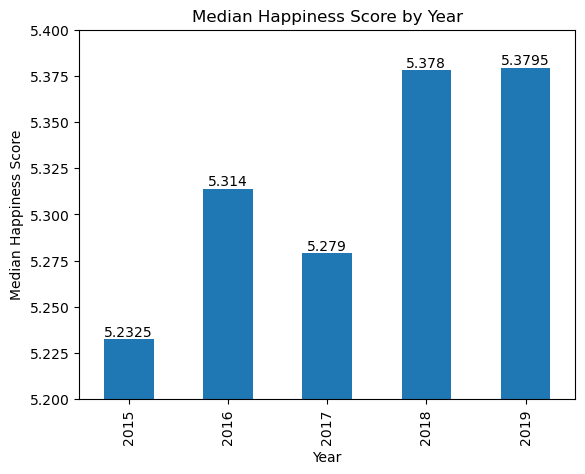

In [12]:
#Graph the median of each year
median = merged_df[['Year', 'Happiness Score']]
median.set_index("Year", inplace=True)  # Set the index to "Year"
median = median.groupby("Year")['Happiness Score'].median().to_frame()
ax = median.plot(kind ='bar', title='Median Happiness Score by Year', xlabel='Year', ylabel='Median Happiness Score', legend=False)

#Zooming in on a specific range of values for better visualization
ax.set_ylim([5.2, 5.4])

#Label each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

In [16]:
#Print summary statistics of dataframes
for year in df_list:
    df = year
    print(df['Year'][0])
    print(df['Happiness Score'].describe())
    print('----------')

2015
count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64
----------
2016
count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness Score, dtype: float64
----------
2017
count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Happiness Score, dtype: float64
----------
2018
count    156.000000
mean       5.375917
std        1.119506
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Happiness Score, dtype: float64
----------
2019
count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500

By examining the two graphs, we can see that the Happiness Score tends to rise from 2016 to 2019, with the exception of a drop from 2016 to 2017. Additionally, the graph indicates that the data is skewed to the right, since the average Happiness Score remains higher than the median over time. To obtain a more precise representation of the sample set, it would be advisable to rely on the median, given the skewed distribution of the data.

Median Happiness Scores by Year:
- 2015: 5.2325
- 2016: 5.3822
- 2017: 5.2790
- 2018: 5.3780
- 2019: 5.3795